In [1]:
import pandas as pd
from fbprophet import Prophet
from prophet.plot import plot_yearly

# Cargamos el Dataframe de análisis

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


# Creamos los dataFrame de Holiday
## Las apariciones de Peyton  Manning en los playoffs y en el superbowl

In [3]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})

superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [4]:
holidays.tail(2)

,holiday,ds,lower_window,upper_window
1,superbowl,2014-02-02,0,1
2,superbowl,2016-02-07,0,1


# Hacemos un dataframe con las fecha Futuras

### El dataframe "Future" contiene todas la fechas del dataframe original más un año adicional

In [5]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
#future.head(50)

/home/jonathan/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -19.4685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7975.23    0.00333027       229.371           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7993.56   0.000129511       136.478     0.02731           1      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7997.17   0.000734911       157.438      0.8599      0.8599      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     325       7998.51   8.30685e-05       244.937   2.117e-07       0.001      442  LS failed, Hessian reset 
     399       8000.57   8.73339e-05       65.5818           1           1      533   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8002.44   0.000319089    

# Entrenamos el modelo y hacemos la predicción 

In [6]:
m = Prophet(holidays=holidays)
forecast = m.fit(df).predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -19.4685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8123.11     0.0238479       980.082      0.1416           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8142.64   0.000386229       130.804           1           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        8146.9    0.00206288       447.821           1           1      364   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8151.03   0.000776419       206.238      0.4567      0.4567      485   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     444       8151.82    4.7276e-05        140.51   6.131e-07       0.001      597  LS failed, Hessian reset 
     490       8152.31   3.63515e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


### abs() returna el valor absoluto de un número dado

In [7]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.223965,1.201517
2191,2014-02-03,1.901742,1.460471
2532,2015-01-11,1.223965,0.000000
2533,2015-01-12,1.901742,0.000000
2901,2016-01-17,1.223965,0.000000
2902,2016-01-18,1.901742,0.000000
2908,2016-01-24,1.223965,0.000000
2909,2016-01-25,1.901742,0.000000
2922,2016-02-07,1.223965,1.201517
2923,2016-02-08,1.901742,1.460471


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


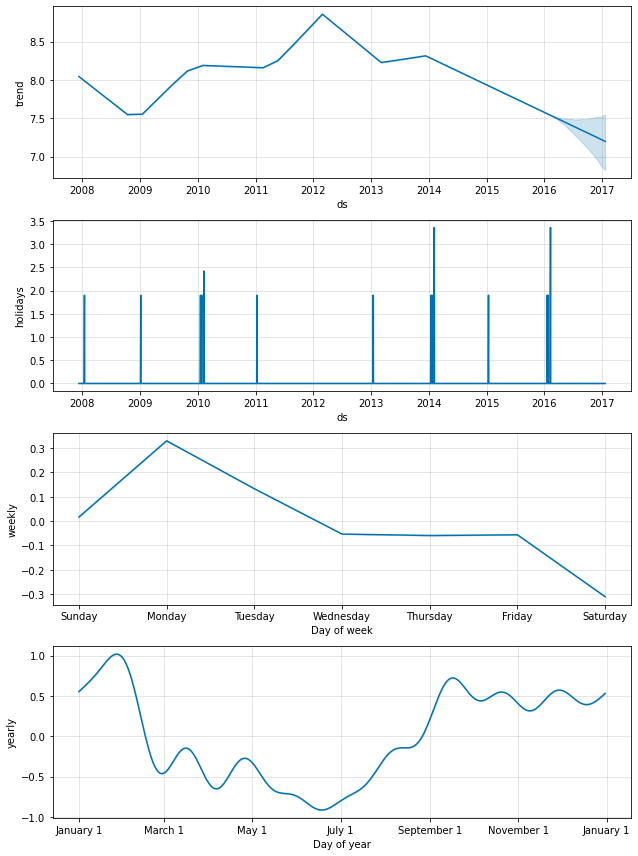

In [8]:
fig = m.plot_components(forecast)

# Añadimos otro dataframe con los Holidays de estados unidos
## Los holidays causan un efecto en la predicción 

In [9]:
m = Prophet(holidays=holidays)
m.add_country_holidays(country_name='US')
m.fit(df)
m.train_holiday_names

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -19.4685


0                         playoff
1                       superbowl
2                  New Year's Day
3      Martin Luther King Jr. Day
4           Washington's Birthday
5                    Memorial Day
6                Independence Day
7                       Labor Day
8                    Columbus Day
9                    Veterans Day
10                   Thanksgiving
11                  Christmas Day
12       Christmas Day (Observed)
13        Veterans Day (Observed)
14    Independence Day (Observed)
15      New Year's Day (Observed)
dtype: object

    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8151.96     0.0192759       1552.84           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8173.22    0.00218105       213.514           1           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     240       8176.74   2.63603e-05       93.9476   1.843e-07       0.001      337  LS failed, Hessian reset 
     299       8179.29   0.000753418       398.623      0.7759      0.7759      407   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8181.85    0.00284412         663.6      0.7573      0.7573      533   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8184.65    0.00164005       195.275      0.7693      0.7693      6

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

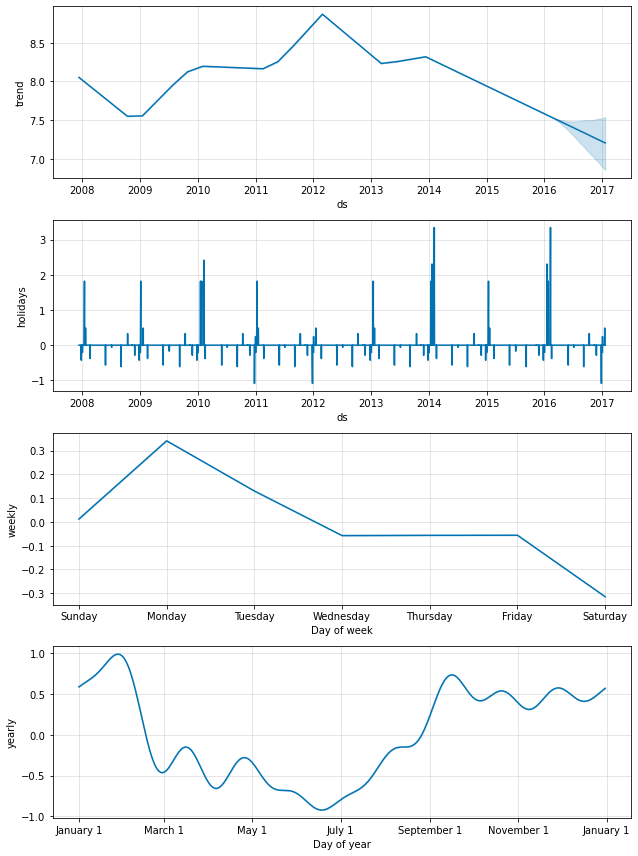

In [10]:
forecast = m.predict(future)
fig = m.plot_components(forecast)

# Orden de fourier para estacionalidades
## Las estacionalidades en prophet son calculadas usando una suma parcial de fourier
## El número de términos en la suma parcial (EL orden), determina que tan rápido puede cambiar la estacionalidad
## Gráficamos la estacionalidad sin tener encuenta los efectos de los días festivos

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -19.4685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7975.23    0.00333027       229.371           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7993.56   0.000129511       136.478     0.02731           1      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7997.17   0.000734911       157.438      0.8599      0.8599      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     325       7998.51   8.30685e-05       244.937   2.117e-07       0.001      442  LS failed, Hessian reset 
     399       8000.57   8.73339e-05       65.5818           1           1      533   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8002.44   0.000319089    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


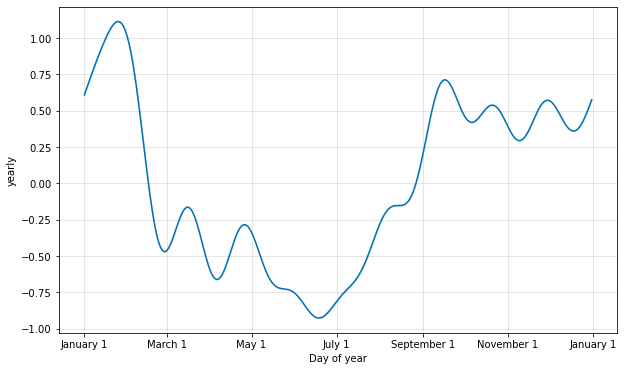

In [11]:
m = Prophet().fit(df)
a = plot_yearly(m)

# Modificamos la estacionalidad del modelo, por defecto se tiene una estacionalidad Anual de 10 
## Puede llegar a ocacionar overfitting

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -19.4685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8018.84     0.0132681        1845.7           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8036.08    0.00942478       285.873      0.6956      0.6956      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8044.38    0.00143018       121.156      0.1696           1      372   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     301       8044.38   3.00676e-05       102.931   2.326e-07       0.001      424  LS failed, Hessian reset 
     399       8046.99   0.000970009       194.325           1           1      553   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     404       8047.18   3.25821e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


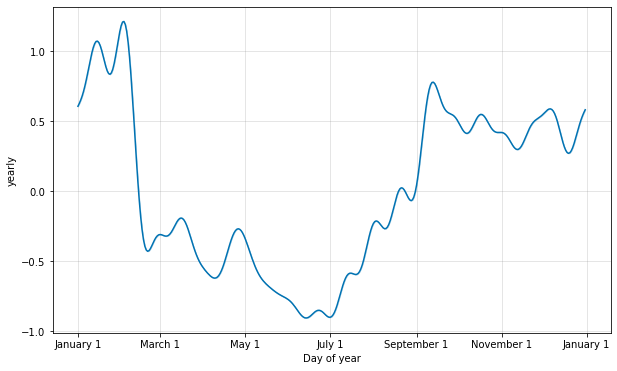

In [12]:
m = Prophet(yearly_seasonality=20).fit(df)
a = plot_yearly(m)

# Estacionalidades personalizadas
## Prophet por defecto ajustará estacionalidades diarias, semanales y anuales, si la serie de tiempo tiene más de 2 ciclos de duración
## Se pueden añadir otras estacionalidades (mensuales, quarterly, hourly)
## Reemplazamos la estacionalidad semanal por defecto por una estacionalidad mensual

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -19.4685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7783.34    0.00347921       410.928      0.2956           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7799.09   0.000145578       152.511      0.4504      0.4504      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7802.12    0.00596376       126.512           1           1      372   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7803.22    0.00212854       147.871           1           1      504   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7804.96    0.00041029        59.625      0.9848      0.9848      631   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

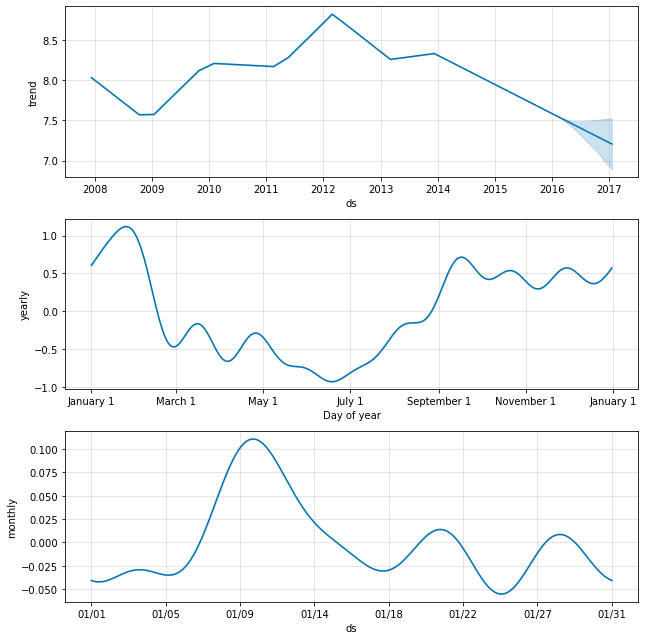

In [13]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5) #monthly es un nombre predefinido
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

# Estacionalidades que dependen de otros factores
## La estacionalidad puede depender de otros factores, patrones estacionales diarios que son diferentes los fines de semana vs días de semana. Estas estacionalidades pueden ser modeladas utilizando estacionalidades condicionales.

### En el ejemplo se considera el mismo patron de estacionalidad semanal para todo el año, ahora se quieren tener 2 estacionalidades semanales, una cuando se está en temporada(Juegos cada domindo) y otra fuera de temporada. 

### Añadimos una columna booleana que indique si es on-season o off-season

In [14]:
def is_nfl_season(ds):
    date = pd.to_datetime(ds)
    return (date.month > 8 or date.month < 2)

df['on_season'] = df['ds'].apply(is_nfl_season)
df['off_season'] = ~df['ds'].apply(is_nfl_season)
df.head(2)


,ds,y,on_season,off_season
0,2007-12-10,9.590761,True,False
1,2007-12-11,8.519590,True,False


# Eliminamos la estacionalidad semanal por defecto y agregamos 2 estacionalidades condicionales
## Se convierten en condicionales, de acuerdo a las columnas booleanas del dataframe anterior

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -19.4685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8178.67    0.00700399       400.127           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        8201.9   0.000145905       287.959      0.5657      0.5657      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8206.69    0.00130551       235.002           1           1      364   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     389       8209.49   5.18345e-05       188.577   2.979e-07       0.001      516  LS failed, Hessian reset 
     399       8209.79     0.0012378       284.815       0.376           1      528   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     474       8210.57   3.20075e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

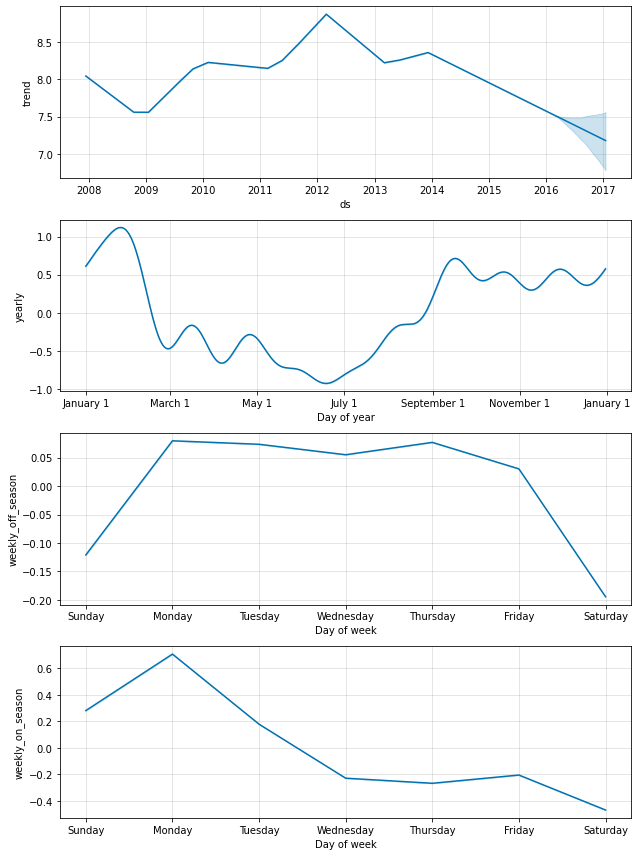

In [17]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='weekly_on_season', period=7, fourier_order=3, condition_name='on_season') # El "name" puede ser cualquiera
m.add_seasonality(name='weekly_off_season', period=7, fourier_order=3, condition_name='off_season')

future['on_season'] = future['ds'].apply(is_nfl_season)
future['off_season'] = ~future['ds'].apply(is_nfl_season)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

# Arreglar overfitting por medio de la escala de prioridad
## Se puede suavizar el efEcto de los Holidays si está provocando un overfitting

In [18]:
m = Prophet(holidays=holidays, holidays_prior_scale=0.05).fit(df)
forecast = m.predict(future)
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
    ['ds', 'playoff', 'superbowl']][-10:]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -19.4685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8118.08      0.016485       271.654           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8132.38    0.00133336       173.951      0.7774      0.7774      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8137.61    0.00102955       218.349           1           1      361   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8142.32   0.000766605       124.736      0.6452      0.6452      480   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     434       8143.01   8.63134e-05       295.085   2.729e-07       0.001      570  LS failed, Hessian reset 
     499       8143.83   8.42356e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,playoff,superbowl
2190,2014-02-02,1.206086,0.964914
2191,2014-02-03,1.852077,0.992634
2532,2015-01-11,1.206086,0.000000
2533,2015-01-12,1.852077,0.000000
2901,2016-01-17,1.206086,0.000000
2902,2016-01-18,1.852077,0.000000
2908,2016-01-24,1.206086,0.000000
2909,2016-01-25,1.852077,0.000000
2922,2016-02-07,1.206086,0.964914
2923,2016-02-08,1.852077,0.992634


## Suavizar el efecto de la estacionalidad

In [19]:
m = Prophet()
m.add_seasonality(
    name='weekly', period=7, fourier_order=3, prior_scale=0.1)

# Añadir regresores adicionales
### 1) Adicionamos una columna de 1 y 0 que indicara 1 si es domingo y está en temporada de juego (On-season)
### 2)Agregamos regressor
### 3)Ajustamos el modelo 
### 4)Agregamos la columna nfl_sunday al dataframe "future"
### 5)Hacemos la predicción del dataframe "future"

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -19.4685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8011.44     0.0085796       605.746           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8028.11   0.000616622       400.427      0.1841      0.1841      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8033.01    0.00724439       244.029           1           1      367   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     316       8033.82   7.27313e-05       225.548   3.966e-07       0.001      425  LS failed, Hessian reset 
     399       8035.28   0.000152496       142.723      0.5157      0.5157      534   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8038.06   0.000119087    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

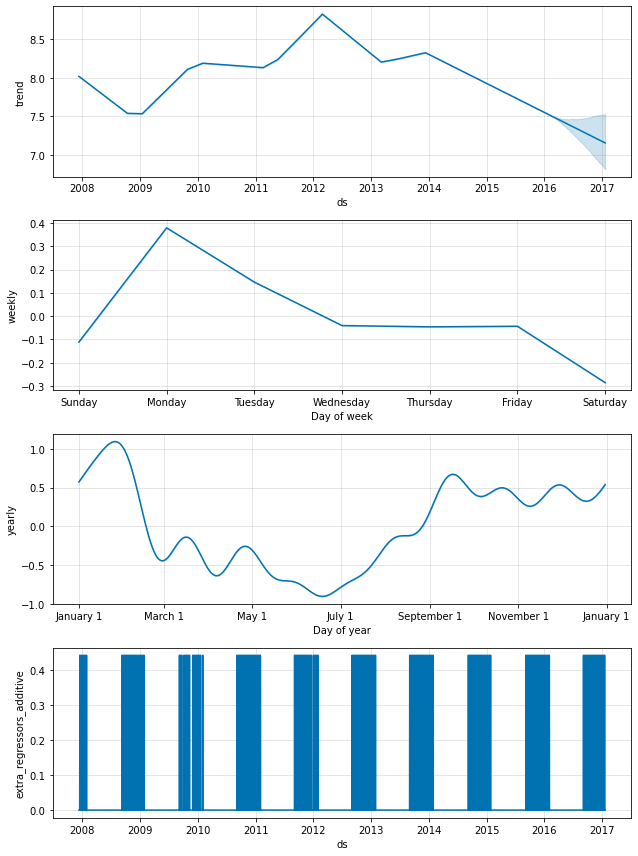

In [20]:
def nfl_sunday(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6 and (date.month > 8 or date.month < 2):
        return 1
    else:
        return 0
df['nfl_sunday'] = df['ds'].apply(nfl_sunday)

m = Prophet()
m.add_regressor('nfl_sunday')
m.fit(df)

future['nfl_sunday'] = future['ds'].apply(nfl_sunday)

forecast = m.predict(future)
fig = m.plot_components(forecast)